<a href="https://colab.research.google.com/github/mgnarag/binarization-autoencoder/blob/main/model5_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls drive/My\ Drive
file_path = "/content/drive/My Drive/Architectural_designs/one quadrant/"

In [8]:

import time
import pandas as pd


import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


from PIL import Image, ImageOps
import os
import numpy as np

epoch = 100
model_number = 5
size = 128

def crop(im):
    width, height = im.size
    data = []

    for j in np.arange(0,int(height/size)+1,0.3775):
        for i in np.arange(0,int(width/size)+1,0.3775):
            im1 = im.crop((0 + (size*i), 0 + (size*j), size + (size*i), size + (size*j)))
            im1 = np.array(im1)
            im1 = im1.astype(np.float32)
            im1 = im1/255
            data.append(im1)
    return data



'''
train_input = np.array(crop(Image.open(file_path + "final_input_train.png")))
print("Done reading the  training input of size = ", train_input.shape)

train_output = np.array(crop(Image.open(file_path + "cleaned_output_train.png")))
print("Done reading the  training out of size = ", train_output.shape)

test_input = np.array(crop(Image.open(file_path + "final_input_test.png")))
print("Done reading the  test input of size = ", test_input.shape)

test_output = np.array(crop(Image.open(file_path + "cleaned_output_test.png")))
print("Done reading the  test output of size = ", test_output.shape)
'''

train_input = np.array(crop(ImageOps.grayscale(Image.open(file_path + "final_input_train.png"))))
print("Done reading the  training input of size = ", train_input.shape)

train_output = np.array(crop(ImageOps.grayscale(Image.open(file_path + "cleaned_output_train.png"))))
print("Done reading the  training out of size = ", train_output.shape)

test_input = np.array(crop(ImageOps.grayscale(Image.open(file_path + "final_input_test.png"))))
print("Done reading the  test input of size = ", test_input.shape)

test_output = np.array(crop(ImageOps.grayscale(Image.open(file_path + "cleaned_output_test.png"))))
print("Done reading the  test output of size = ", test_output.shape)
#'''

Done reading the  training input of size =  (22484, 128, 128)
Done reading the  training out of size =  (22484, 128, 128)
Done reading the  test input of size =  (9394, 128, 128)
Done reading the  test output of size =  (9394, 128, 128)


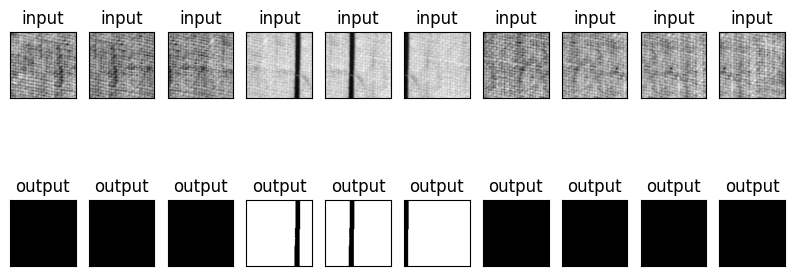

In [ ]:

n = 10
plt.figure(figsize=(10, 4))
for i in range(0,10):

    ax = plt.subplot(2, n, i + 1)
    plt.title("input")
    plt.imshow((train_input[i+10]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    bx = plt.subplot(2, n, i + n + 1)
    plt.title("output")
    plt.imshow((train_output[i+10]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()



In [9]:
start = time.time()
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class autoenc(Model):
  def __init__(self):
    super(autoenc, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(size, size, 1)),
      layers.Conv2D(64, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(128, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(256, (3, 3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(256, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(128, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(64, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = autoenc()


autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

model = autoencoder.fit(train_input, train_output,
                epochs=epoch,
                shuffle=True,
                validation_data=(test_input, test_output))

autoencoder.encoder.summary()



autoencoder.save(file_path + '1 Models/' + 'autoencoder_'+str(model_number) + '_b')

loss = model.history['loss']
loss = pd.DataFrame(loss)
loss.to_csv(file_path + '2 Loss/'+'loss_'+str(model_number)+'_b'+'.csv')
val_loss = model.history['val_loss']
val_loss = pd.DataFrame(val_loss)
val_loss.to_csv(file_path + '3 Validation loss/' +'val_loss_'+str(model_number)+'_b'+'.csv')

# record end time
end = time.time()

print("The time of execution of above program is :",
      (end-start), "seconds")

Epoch 1/100
703/703 [==============================] - 28s 21ms/step - loss: 0.0248 - val_loss: 0.0069
Epoch 2/100
703/703 [==============================] - 12s 17ms/step - loss: 0.0072 - val_loss: 0.0060
Epoch 3/100
703/703 [==============================] - 12s 17ms/step - loss: 0.0065 - val_loss: 0.0051
Epoch 4/100
703/703 [==============================] - 12s 17ms/step - loss: 0.0060 - val_loss: 0.0051
Epoch 5/100
703/703 [==============================] - 12s 17ms/step - loss: 0.0058 - val_loss: 0.0045
Epoch 6/100
703/703 [==============================] - 12s 17ms/step - loss: 0.0055 - val_loss: 0.0042
Epoch 7/100
703/703 [==============================] - 12s 17ms/step - loss: 0.0053 - val_loss: 0.0042
Epoch 8/100
703/703 [==============================] - 12s 17ms/step - loss: 0.0051 - val_loss: 0.0041
Epoch 9/100
703/703 [==============================] - 12s 17ms/step - loss: 0.0049 - val_loss: 0.0039
Epoch 10/100
703/703 [==============================] - 12s 17ms/step - l

The time of execution of above program is : 1217.0694358348846 seconds
